<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/FbProphet_Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install yfinance prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objs as go

In [64]:
data = yf.download(tickers='BTC-USD', start='2020-01-01', end='2022-11-30', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [65]:
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [66]:
fig = go.Figure()

In [67]:
fig.add_trace(go.Candlestick(x=data.Date,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], 
                name = 'Bitcoin Data'))

df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df.head()

,ds,y
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [68]:
df_train = df[df['ds']<='2022-10-30']
df_test = df[df['ds']>'2022-10-30']

In [69]:
m = Prophet(interval_width=0.95, n_changepoints=15)
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxyuspgh/5dno79bh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxyuspgh/22hga33r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71542', 'data', 'file=/tmp/tmpzxyuspgh/5dno79bh.json', 'init=/tmp/tmpzxyuspgh/22hga33r.json', 'output', 'file=/tmp/tmpzxyuspgh/prophet_modeluux8_g4n/prophet_model-20221201145255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


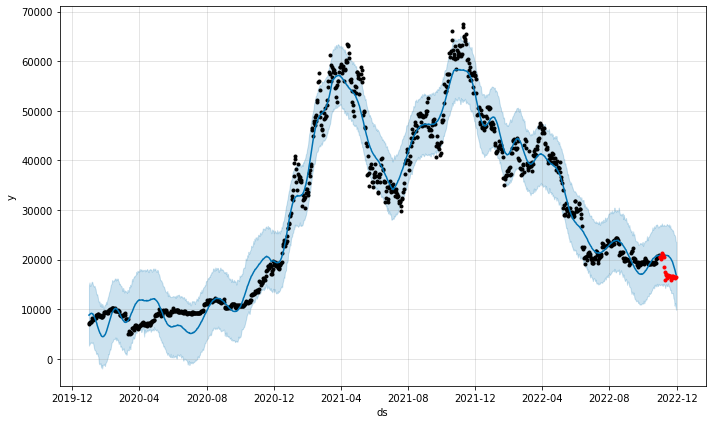

In [70]:
future = m.make_future_dataframe(periods=31)
# Forecast the future dataframe values
forecast = m.predict(future)
# Check the forecasted values and upper/lower bound
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# Visualize the forecast
fig = m.plot(forecast)
ax = fig.gca()
ax.plot( df_test["ds"], df_test["y"], 'r.')

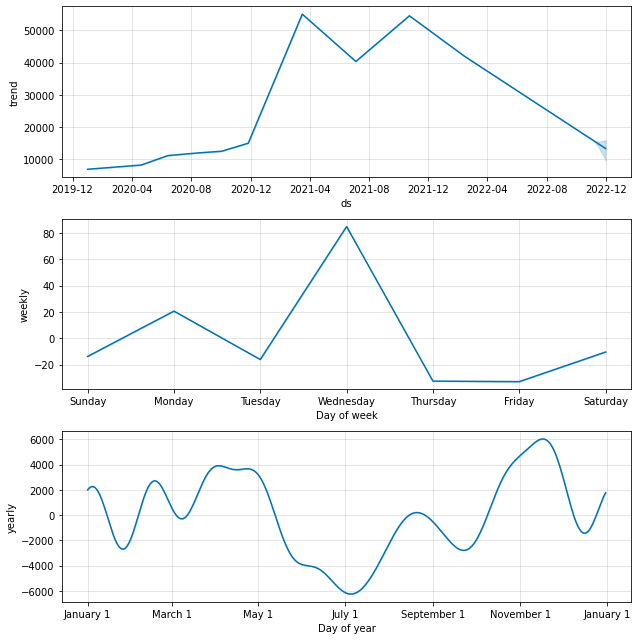

In [71]:
m.plot_components(forecast);

There are 15 change points. 
The change points dates are 
            ds             y
55  2020-02-25   9341.705078
110 2020-04-20   6881.958496
165 2020-06-14   9386.788086
220 2020-08-08  11754.045898
275 2020-10-02  10575.974609
330 2020-11-26  17150.623047
385 2021-01-20  35547.750000
441 2021-03-17  58870.894531
496 2021-05-11  56704.574219
551 2021-07-05  33746.003906
606 2021-08-29  48829.832031
661 2021-10-23  61393.617188
716 2021-12-17  46202.144531
771 2022-02-10  43565.113281
826 2022-04-06  43206.738281


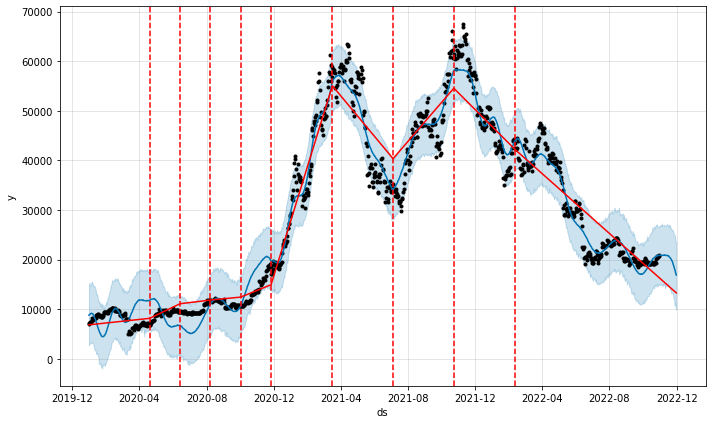

In [72]:
print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [73]:
df_cv = cross_validation(m, initial='500 days', period='60 days', horizon = '30 days', parallel="processes")
df_cv.head()

INFO:prophet:Making 9 forecasts with cutoffs between 2021-06-07 00:00:00 and 2022-09-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8ac32bbe20>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxyuspgh/w44i1k2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxyuspgh/jrrraaow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxyuspgh/l2nssa5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxyuspgh/i2clsqzb.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61051', 'data', 'file=/tmp/tmpzxyuspgh/w44i1k2d.json', 'init=/tmp/tmpzxyuspgh/l2nssa5r.json', 'output', 'file=/tmp/tmpzxyuspgh/prophet_model70ce4yut/prophet_model-20221201145302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
14:53:02 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:running 

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-06-08,37115.808777,32757.975911,41417.968691,33472.632812,2021-06-07
1,2021-06-09,36945.631948,32776.512860,41150.280817,37345.121094,2021-06-07
2,2021-06-10,36780.035718,32267.743410,40898.464721,36702.597656,2021-06-07
3,2021-06-11,36635.764084,32486.258431,40695.109081,37334.398438,2021-06-07
4,2021-06-12,36445.208931,32167.439922,40305.367548,35552.515625,2021-06-07


In [74]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3.362071e+07,5798.336505,4453.329239,0.102540,0.108840,0.104677,0.629630
1,4 days,3.322105e+07,5763.770394,4420.456371,0.101932,0.090872,0.104785,0.666667
2,5 days,3.850476e+07,6205.220024,4725.213880,0.109844,0.090872,0.112488,0.666667
3,6 days,4.475410e+07,6689.850674,5167.507950,0.119691,0.104950,0.121788,0.666667
4,7 days,5.000073e+07,7071.119310,5479.228571,0.125358,0.107960,0.127673,0.666667


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



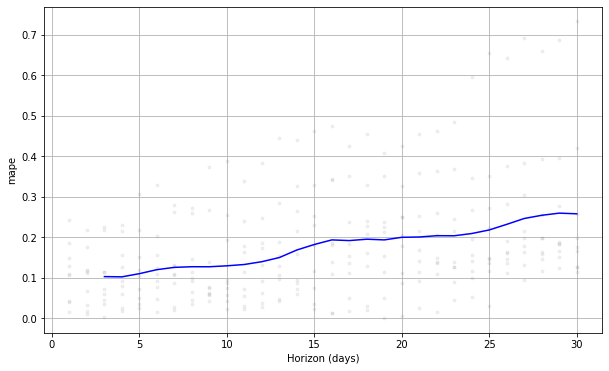

In [75]:
fig = plot_cross_validation_metric(df_cv, metric='mape')